In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def tiles_cluster(path , num_cluster):
 image_features = pd.DataFrame()
 j=0
 for i in os.listdir(path):
   original_image_array = mpimg.imread(path + i)
   flat_array = original_image_array.flatten()
   if image_features.empty:   
    image_features = pd.DataFrame(flat_array).T
   else:
    image_features.loc[len(image_features)] = flat_array
 k = KMeans(n_clusters = num_cluster)
 image_clusters = pd.DataFrame(k.fit_predict(image_features),columns=['Clusters']).sort_values('Clusters')  
 fig = plt.figure(figsize=(10,10))
 fig.suptitle(" Tiles Clustering ", fontsize= 16)
 fig.subplots_adjust()
 for i in list(image_clusters.index.values):
      ax = fig.add_subplot(4,4,j+1, xticks=[], yticks=[])
      image = image_features.loc[i].values.reshape(original_image_array.shape[0]
                                                 ,original_image_array.shape[1]
                                                 ,original_image_array.shape[2])        
      ax.imshow(image)
      ax.set_title("Cluster " + str(image_clusters.get_value(i,'Clusters'))) 
      j+=1 

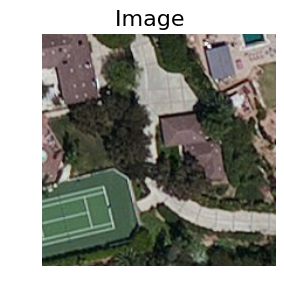

In [3]:
image_full = mpimg.imread("escondido_tile.tif")
fig = plt.figure(figsize=(4,3))
fig.suptitle("Image ", fontsize= 16)
plt.axis('off')
plt.imshow(image_full)

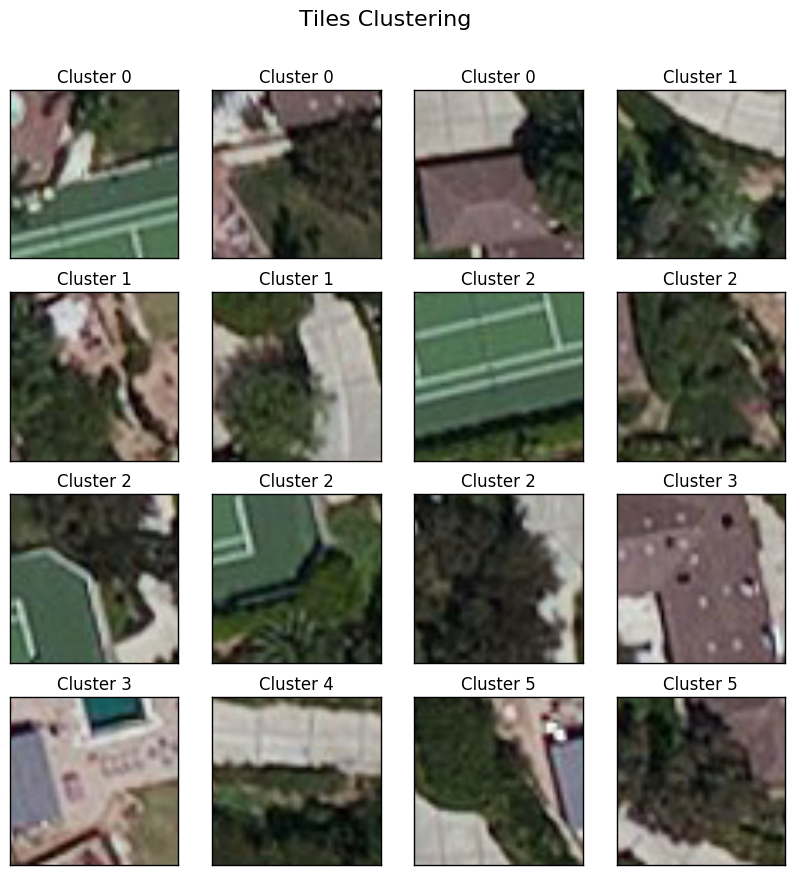

In [4]:
path = "./Tiles/escondido_tile/"
num_cluster = 6
tiles_cluster(path , num_cluster)